In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv('Food-Truck-LineReg.csv',header=None)

In [13]:
data.columns

Int64Index([0, 1], dtype='int64')

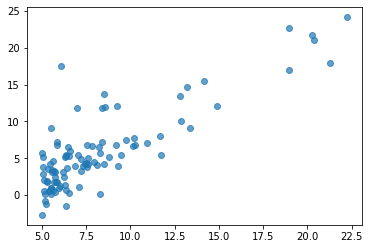

In [17]:
x,y=data[0],data[1]
plt.scatter(x,y,alpha=0.7)

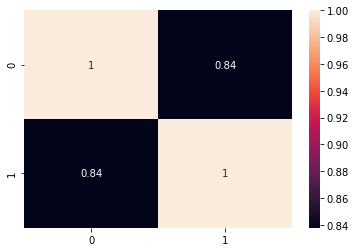

In [20]:
ax = sns.heatmap(data.corr(), annot=True)

In [21]:
data[1].corr(data[0])

0.837873232526341

In [28]:
data.columns=["x","y"]

In [31]:
data["x"].size

97

In [32]:
xsq=[]
ysq=[]
xy=[]

for i in range (len(data)):
    xsq.append(round(data.x[i]**2,3))
    ysq.append(round(data.y[i]**2,3))
    xy.append(round(data.x[i]*data.y[i],3))

data["x^2"]=xsq
data["y^2"]=ysq
data["xy"]=xy

In [33]:
data

,x,y,x^2,y^2,xy
0,6.1101,17.59200,37.333,309.478,107.489
1,5.5277,9.13020,30.555,83.361,50.469
2,8.5186,13.66200,72.567,186.650,116.381
3,7.0032,11.85400,49.045,140.517,83.016
4,5.8598,6.82330,34.337,46.557,39.983
...,...,...,...,...,...
92,5.8707,7.20290,34.465,51.882,42.286
93,5.3054,1.98690,28.147,3.948,10.541
94,8.2934,0.14454,68.780,0.021,1.199
95,13.3940,9.05510,179.399,81.995,121.284


In [36]:
def avg(ls):
    sum=0
    for it in ls:
        sum=sum+it
    return sum/len(ls)

In [48]:
def sd(xcol):
    temp=0
    for it in xcol:
        temp = temp+(it-avg(xcol))**2

    variance=temp/len(xcol)
    sd=(variance)**(1/2)
    return sd

In [49]:
sdx=sd(data['x'])

In [51]:
sdy=sd(data['y'])

In [52]:
print(sdx)
print(sdy)

3.8498839959227156
5.48178525707763


In [55]:
def summation(summ):
    return avg(summ)*len(data)

In [56]:
xy=summation(data['xy'])

In [58]:
xsquare=summation(data['x^2'])
ysquare=summation(data['y^2'])

In [59]:
#Coefficient of regression 
r=xy/(xsquare*ysquare)

In [60]:
r

0.0001289796980410205

In [63]:
#slope
m= r * sdy /sdx

In [64]:
m

0.00018365202897863733

In [65]:
#y=mx+c
#c=y-mx

c= avg(data['y'])-m*avg(data['x'])

In [66]:
c

5.83763648772033

In [67]:
#y=mx+c
y_pred=m*data['x']+c

In [68]:
y_pred

0     5.838759
1     5.838652
2     5.839201
3     5.838923
4     5.838713
        ...   
92    5.838715
93    5.838611
94    5.839160
95    5.840096
96    5.838635
Name: x, Length: 97, dtype: float64

In [71]:
data['y_pred']=y_pred

In [72]:
data

,x,y,x^2,y^2,xy,y_pred
0,6.1101,17.59200,37.333,309.478,107.489,5.838759
1,5.5277,9.13020,30.555,83.361,50.469,5.838652
2,8.5186,13.66200,72.567,186.650,116.381,5.839201
3,7.0032,11.85400,49.045,140.517,83.016,5.838923
4,5.8598,6.82330,34.337,46.557,39.983,5.838713
...,...,...,...,...,...,...
92,5.8707,7.20290,34.465,51.882,42.286,5.838715
93,5.3054,1.98690,28.147,3.948,10.541,5.838611
94,8.2934,0.14454,68.780,0.021,1.199,5.839160
95,13.3940,9.05510,179.399,81.995,121.284,5.840096


In [73]:
y_minus_y_pred=y-y_pred

In [75]:
y_minus_y_pred_square = y_minus_y_pred**2

In [77]:
data['y_minus_y_pred']=y_minus_y_pred
data['y_minus_y_pred_square']=y_minus_y_pred_square

In [78]:
data

,x,y,x^2,y^2,xy,y_pred,y_minus_y_pred,y_minus_y_pred_square
0,6.1101,17.59200,37.333,309.478,107.489,5.838759,11.753241,138.138683
1,5.5277,9.13020,30.555,83.361,50.469,5.838652,3.291548,10.834290
2,8.5186,13.66200,72.567,186.650,116.381,5.839201,7.822799,61.196185
3,7.0032,11.85400,49.045,140.517,83.016,5.838923,6.015077,36.181156
4,5.8598,6.82330,34.337,46.557,39.983,5.838713,0.984587,0.969412
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,34.465,51.882,42.286,5.838715,1.364185,1.861002
93,5.3054,1.98690,28.147,3.948,10.541,5.838611,-3.851711,14.835676
94,8.2934,0.14454,68.780,0.021,1.199,5.839160,-5.694620,32.428692
95,13.3940,9.05510,179.399,81.995,121.284,5.840096,3.215004,10.336249


In [79]:
sse = summation(data['y_minus_y_pred_square'])

In [89]:
a=avg(data['y'])
sst=summation((y-a)**2)

In [97]:
ssr = summation((y_pred-avg(y_pred))**2)

In [98]:
ssr

4.849070329488621e-05

In [100]:
sst

2914.8470516572247

In [104]:
rsquare = 1-(sse/sst)

In [105]:
rsquare

0.000216120637293149

In [106]:
sse

2914.2170930548086

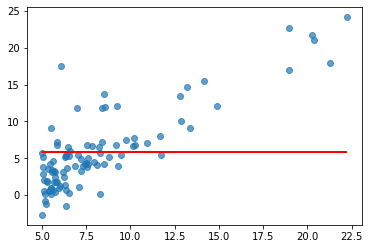

In [108]:
plt.scatter(x,y,alpha=0.7)
plt.plot(x,y_pred,color='red')